[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Probability%20Distributions/Python/Binomial.ipynb)

# Definition

The binomial distribution is a discrete probability distribution that describes the probability of obtaining exactly k successes out of n Bernoulli trials, which are individual binary outcomes that each have a success probability of p. For example, if you flip a coin 10 times, what is the probability that it will come up heads 0, 1, 2, ... 10 times?

Mathematically, this distribution defines the probability of obtaining *k* successes in *n* trials given a constant probability of success *p* on each trial, which is defined as:

[1] $P(X=k\: successes)=\left ( \frac{n}{k} \right )p^{k}\left ( 1-p \right )^{n-k}$

for *k* = 0, 1, 2, ... , *n*, and where

$\left ( \frac{n}{k} \right )=\frac{n!}{k!\left ( n-k \right )!}$

 is called the "binomial coefficient" and is pronounced "[n-choose-k](https://www.hackmath.net/en/calculator/n-choose-k)"

# Getting Started with Code


Matlab code is found in the [NGG Statistics GitHub Repository](https://github.com/PennNGG/Statistics.git) under "Probability Distributions/Binomial.m".

Python code is included below. First run the code cell just below to make sure all of the required Python modules are loaded, then you can run the other cell(s).

In [11]:
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

from numpy import matlib

# Tutorial

In [2]:
# Choose some values for the parameters n and p
p = 0.7
n = 1000

# Generate random picks. Note that this is as if we generated Bernoulli trials 
#   as above, but then just counted the successes in each "experiment"
num_successes = binom.rvs(n,p) # uses the "random variates" method (rvs) of binom

# Print out the results
print(f'{num_successes} successes out of {n} trials, simulated p = {p:.4f}, empirical p = {num_successes/n:.4f}')

697 successes out of 1000 trials, simulated p = 0.7000, empirical p = 0.6970


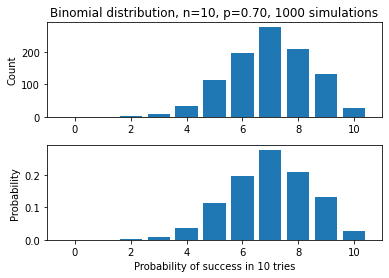

In [3]:
# The full probability distribution describes the probabilty of obtaining each 
#   possible number of successes (k), given n and p. If we set n=10, the the 
#   possible values of k are 0, 1, ..., 10. Now we use binom.rvs to simulate 
#   many different picks to get a full distribution
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Show a bar plot (histogram) of all of the possible outcomes
counts = collections.Counter(outcomes)
plt.subplot(211)
plt.bar(counts.keys(), counts.values())
plt.xlim([-1, n+1])
plt.title(f'Binomial distribution, n={n}, p={p:.2f}, {num_experiments} simulations')
plt.ylabel('Count')

# Show a normalized version that is a pdf. Here counts (the x-axis of the histogram) 
#   is a DISCRETE variable, so we just have to add up the values
normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}
plt.subplot(212)
plt.bar(normalized_counts.keys(), normalized_counts.values())
plt.xlim([-1, n+1])
plt.xlabel(f'Probability of success in {n} tries')
plt.ylabel('Probability')
plt.subplots_adjust(hspace=0.3)

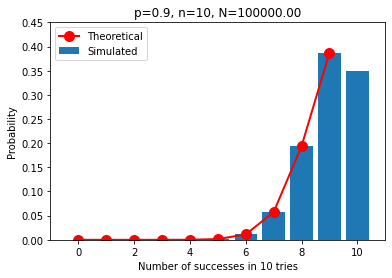

In [4]:
# Now let's make a fun animation showing different values of p and N. 
#   Note that, of course, the more picks you make of the random variable 
#   (higher N), the more closely the outcomes (the "samples") match the true 
#   distribution.
n=10
xs = range(0, n)
f = plt.figure()
for p in np.arange(0, 1, 0.1):
    for N in np.round(np.logspace(1,5,10)):

        # Get the true binomial pdf
        Y = binom.pmf(xs,n,p)

        # Get the random picks, make histogram and normalize
        counts = collections.Counter(binom.rvs(n,p,size=int(N)))
        normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}

        # Show both
        plt.bar(normalized_counts.keys(), normalized_counts.values())
        plt.plot(xs, Y, 'ro-', linewidth=2, markersize=10)
        
        # Labels, etc
        plt.title(f'p={p:.1f}, n={n}, N={N:.2f}')
        plt.xlabel(f'Number of successes in {n} tries')
        plt.ylabel('Probability')
        plt.axis([-1, n+1, 0, 0.45])
        plt.legend(('Theoretical', 'Simulated'))
        plt.show()

        # Wait
        time.sleep(0.1)

        # Clear for next plot
        clear_output(wait=True)



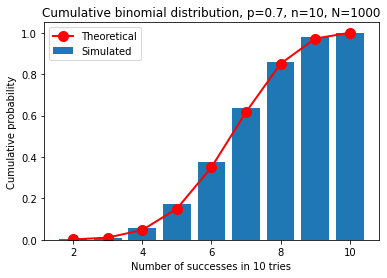

In [6]:
# The cumulative distribution function is just the proability of obtaining an 
#   outcome that is equal to OR LESS THAN a particular value.
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Make histogram
counts = collections.Counter(outcomes)

# Unzip keys from values in a sorted order
keys, values = zip(*sorted(counts.items(), key=itemgetter(0)))

# Compute the cumulative sum of the counts normalized by the total counts (so 
#   it is a probability function and not just a histogram -- note that the final 
#   value in the cdf should equal 1 because every value should be equal to or 
#   less than that value).
total = sum(values)
cumulative_ps = [x/total for x in np.cumsum(values)]

# Plot as a bar graph
plt.bar(keys, cumulative_ps)

# Compare it to the real binomial cumulative distribution, which we find 
#   using binom.cdf
Y = binom.cdf(keys,n,p)
plt.plot(keys, Y, 'ro-', linewidth=2, markersize=10)

# Labels, etc
plt.title(f'Cumulative binomial distribution, p={p:.1f}, n={n}, N={num_experiments}')
plt.xlabel(f'Number of successes in {n} tries')
plt.ylabel('Cumulative probability')
plt.legend(('Theoretical', 'Simulated'))

# Neuroscience Example: Quantal Release

From: Johnson, E.W., and Wernig, A. (1971). [The binomial nature of transmitter release at the crayfish neuromuscular junction](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1331610/). J Physiol 218, 757-767. 

Classic studies by [Bernard Katz and colleagues](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2151334/) indicated that chemical neurotransmitters are released from presynaptic nerve terminals in discrete quanta, or packets, with a relatively constant release probability. A straightforward implication of this idea is that the release statistics (i.e., the distribution of the number of quanta that are actually released in response to a given event like an action potential reaching the presynaptic nerve terminal) should follow a binomial distribution. As stated by Johnson and Wernig:

"If the average probability of release is constant, then it follows from the hypothesis that the relative frequency of 0, 1, 2, 3, . . . quantal releases in a series of trials is given by the successive terms in the binomial expansion $(p + q)^n$, where *q*=1–*p* is the average probability that a quantum will not be released. In a given trial, the probability that *x* quanta will be released (*px*) is given by the binomial term" [i.e., Eq. 1, above, but substitute *x* for *k*].

In other words, if there are *n* available quanta in a presynaptic terminal, and each is released with probability *p*, then the number of quanta that are actually released should follow a binomial distribution with parameters *n* and *p*.

Answers to the exercises below will be found [here](https://github.com/PennNGG/Quantitative-Neuroscience/tree/master/Answers%20to%20Exercises/Python) after the due date.

## Exercise 1
Assume that there are 10 quanta available in a nerve terminal, and for a given release event each is released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?

In [5]:
import math

def binom_pmf(n: int, p: float):
    """Return list of P(X=k) for k=0..n where X ~ Binomial(n, p)."""
    q = 1.0 - p
    return [math.comb(n, k) * (p ** k) * (q ** (n - k)) for k in range(n + 1)]

n = 10   # Number of quanta
p = 0.2 # Probabilty of release
probs = binom_pmf(n, p)

# Print a tidy table
for k, pk in enumerate(probs):
    print(f"k={k:2d}  P(X={k}) = {pk:.9f}")


k= 0  P(X=0) = 0.107374182
k= 1  P(X=1) = 0.268435456
k= 2  P(X=2) = 0.301989888
k= 3  P(X=3) = 0.201326592
k= 4  P(X=4) = 0.088080384
k= 5  P(X=5) = 0.026424115
k= 6  P(X=6) = 0.005505024
k= 7  P(X=7) = 0.000786432
k= 8  P(X=8) = 0.000073728
k= 9  P(X=9) = 0.000004096
k=10  P(X=10) = 0.000000102


## Exercise 2
Let's say you know that a given nerve terminal contains exactly 14 quanta available for release. You have read in the literature that the release probability of these quanta is low, say 0.1. To assess whether this value is reasonable, you run a simple experiment: activate the nerve and measure the number of quanta that are released. The result is 8 quanta. What is the probability that you would get this result (8 quanta) if the true probability of release really was 0.1? What about if the true release probability was much higher; say, 0.7? What about for each decile of release probability (0.1, 0.2, ... 1.0)? Which value of release probability did you determine to be the most probable, given your measurement?

Note: here you are computing a likelihood function: a function describing how the value of the conditional probability *p*(*data* | *parameters*) changes when you hold your data fixed to the value(s) you measured and vary the value(s) of the parameter(s) of, in this case, the binomial distribution. Because you are varying the parameters and not the data, the values of the function are not expected to sum to one (e.g., you can have numerous parameters that have a very high probability of producing the given data) and thus this function is not a probability distribution (see [here](https://www.psychologicalscience.org/observer/bayes-for-beginners-probability-and-likelihood) for an extended discussion). The maximum value of this function is called the maximum likelihood. 

# Answer:
When p=0.1:  P(X=8 | n=14, p) = 0.000015959173. When p=0.7:  P(X=8 | n=14, p) = 0.126202274068. Among the deciles, p=0.6 gives the highest likelihood.

In [12]:
import math

n = 14 #n trials (available quanta)
x = 8 #released quanta 

def binom_likelihood(p: float, n: int, x: int) -> float:
    """L(p) = P(X=x | n, p) for X ~ Binomial(n, p)."""
    return math.comb(n, x) * (p ** x) * ((1 - p) ** (n - x))

# Probabilities for p = 0.1 and p = 0.7
for p in [0.1, 0.7]:
    print(f"p={p:.1f}:  P(X={x} | n={n}, p) = {binom_likelihood(p, n, x):.12f}")

print("\nDeciles 0.1..1.0")
deciles = [i/10 for i in range(1, 11)]
liks = [(p, binom_likelihood(p, n, x)) for p in deciles]
for p, L in liks:
    print(f"p={p:>3.1f}  L={L:.12f}")


p=0.1:  P(X=8 | n=14, p) = 0.000015959173
p=0.7:  P(X=8 | n=14, p) = 0.126202274068

Deciles 0.1..1.0
p=0.1  L=0.000015959173
p=0.2  L=0.002015279186
p=0.3  L=0.023180009523
p=0.4  L=0.091821157908
p=0.5  L=0.183288574219
p=0.6  L=0.206597605294
p=0.7  L=0.126202274068
p=0.8  L=0.032244466975
p=0.9  L=0.001292693032
p=1.0  L=0.000000000000


## Exercise 3

Not feeling convinced by your single experiment (good scientist!), you repeat it under identical conditions. This time you measure 5 quanta that were released. Your sample size has now doubled, to two measurements. You now want to take into account both measurements when you assess the likelihoods of different possible values of the underlying release probability. To do so, assume that the two measurements in this sample are independent of one another; that is, the value of each result had no bearing on the other. In this case, the total likelihood is simply the product of the likelihoods associated with each separate measurement. It is also typical to compute the logarithm of each likelihood and take their sum, which is often more convenient. What are the values of the total likelihood and total log-likelihood in this example, if we assume that the true release probability is 0.1?

Of course, knowing those values of the likelihood and log-likelihood is not particularly useful until you can compare them to the values computed for other possible values for the release probability, so you can determine which value of release probability is most likely, given the data. Therefore, compute the full likelihood and log-likelihood functions using deciles of release probability between 0 and 1. What is the maximum value? Can you improve your estimate by computing the functions at a higher resolution? How does the estimate improve as you increase the sample size?

# Answer: Part 1: total likelihood and total log-likelihood at p = 0.1

In [14]:
import math
import numpy as np

# Problem setup
n = 14                  # available quanta per activation
x_obs = [8, 5]          # two independent measurements
x_total = sum(x_obs)
N_total = n * len(x_obs)

def binom_likelihood_single(p: float, n: int, x: int) -> float:
    """Single-binomial likelihood P(X=x | n,p)."""
    if p <= 0.0:
        return 1.0 if x == 0 else 0.0
    if p >= 1.0:
        return 1.0 if x == n else 0.0
    return math.comb(n, x) * (p**x) * ((1 - p)**(n - x))

def joint_likelihood(p: float, n: int, xs) -> float:
    """Product of independent likelihoods across observations."""
    L = 1.0
    for x in xs:
        L *= binom_likelihood_single(p, n, x)
    return L

def joint_loglikelihood(p: float, n: int, xs) -> float:
    """Sum of log-likelihoods; returns -inf if any term is zero."""
    if p <= 0.0 or p >= 1.0:
        for x in xs:
            if (p == 0.0 and x > 0) or (p == 1.0 and x < n):
                return float("-inf")
        return 0.0
    return sum(math.log(binom_likelihood_single(p, n, x)) for x in xs)


In [15]:
# 1) Values at p = 0.1 (asked explicitly)
p_test = 0.1
L_01 = joint_likelihood(p_test, n, x_obs)
logL_01 = joint_loglikelihood(p_test, n, x_obs)
print(f"Two measurements x={x_obs} with n={n} each")
print(f"At p={p_test:.1f}:  joint likelihood = {L_01:.12e},   joint log-likelihood = {logL_01:.12f}\n")


Two measurements x=[8, 5] with n=14 each
At p=0.1:  joint likelihood = 1.237818721500e-07,   joint log-likelihood = -15.904744915931



# Answer:  Part 2: Full likelihood and log-likelihood functions using deciles of release probability between 0 and 1, and p at maximum L (occurs at p = 0.5)

In [20]:
# 2) Likelihood and log-likelihood over deciles p=0.0..1.0
deciles = [i/10 for i in range(11)]
rows = [(p, joint_likelihood(p, n, x_obs), joint_loglikelihood(p, n, x_obs)) for p in deciles]

print("Deciles (p) | Joint Likelihood L(p) | Joint Log-Likelihood logL(p)")
for p, L, logL in rows:
    print(f"{p:>4.1f}      {L:.12e}          {logL: .12f}")

# Argmax over deciles
p_star_dec, L_star_dec, logL_star_dec = max(rows, key=lambda t: t[1])
print(f"\nArgmax over deciles: p = {p_star_dec:.1f},  L = {L_star_dec:.12e},  logL = {logL_star_dec:.12f}")


Deciles (p) | Joint Likelihood L(p) | Joint Log-Likelihood logL(p)
 0.0      0.000000000000e+00          -inf
 0.1      1.237818721500e-07          -15.904744915931
 0.2      1.732842750806e-04          -8.660577103498
 0.3      4.550575422829e-03          -5.392501587460
 0.4      1.897003133922e-02          -3.964894842995
 0.5      2.239646762609e-02          -3.798852027820
 0.6      8.431125039654e-03          -4.775825059212
 0.7      8.358199756217e-04          -7.087097308234
 0.8      1.083026719254e-05          -11.433165825738
 0.9      1.528171261111e-09          -20.299194070604
 1.0      0.000000000000e+00          -inf

Argmax over deciles: p = 0.5,  L = 2.239646762609e-02,  logL = -3.798852027820


# Answer:  Part 3: Can you improve your estimate by computing the functions at a higher resolution? 

# 
Yes, computing the likelihood on a finer grid (or using the closed-form MLE) improves the estimate toward p = 0.4643

In [21]:
# 3) Higher resolution & closed-form MLE
# Closed-form MLE for independent binomials: p_hat = total successes / total trials
p_hat = x_total / N_total
L_hat = joint_likelihood(p_hat, n, x_obs)
logL_hat = joint_loglikelihood(p_hat, n, x_obs)
print(f"\nClosed-form MLE: p_hat = x_total / N_total = {x_total}/{N_total} = {p_hat:.12f}")
print(f"L(p_hat) = {L_hat:.12e},  logL(p_hat) = {logL_hat:.12f}")

# Dense numerical check (grid)
grid = np.linspace(1e-9, 1 - 1e-9, 200_001)
# Use log-likelihood for stability; exponentiate only at the max
def joint_loglikelihood_safe(p):
    if p <= 0.0 or p >= 1.0:
        return float("-inf")
    # fast log-choose using lgamma
    s = 0.0
    for x in x_obs:
        s += (math.lgamma(n+1) - math.lgamma(x+1) - math.lgamma(n-x+1) +
              x * math.log(p) + (n - x) * math.log(1 - p))
    return s

logLs = np.array([joint_loglikelihood_safe(float(p)) for p in grid])
i_max = int(np.argmax(logLs))
p_star_grid = float(grid[i_max])
L_star_grid = float(math.exp(logLs[i_max]))
print(f"Numerical grid argmax: p* ≈ {p_star_grid:.12f},  L ≈ {L_star_grid:.12e}")


Closed-form MLE: p_hat = x_total / N_total = 13/28 = 0.464285714286
L(p_hat) = 2.405619821701e-02,  logL(p_hat) = -3.727362593514
Numerical grid argmax: p* ≈ 0.464285000071,  L ≈ 2.405619821632e-02


# Answer: Part 4: How does the estimate improve as you increase the sample size?

##
as sample size grows, the estimator’s uncertainty shrinks and estimate becomes more precise.

In [22]:
# 4) Precision vs. sample size (SE of p-hat ≈ sqrt(p(1-p)/N_total))
def se_phat(p_est: float, n: int, m_obs: int) -> float:
    N = n * m_obs
    return math.sqrt(p_est * (1 - p_est) / N)

print("\nApproximate SE of p-hat vs. number of measurements m (each with n=14):")
for m in [2, 3, 5, 10, 20, 50, 100]:
    print(f"m={m:>3d}  SE≈ {se_phat(p_hat, n, m):.6f}")


Approximate SE of p-hat vs. number of measurements m (each with n=14):
m=  2  SE≈ 0.094250
m=  3  SE≈ 0.076955
m=  5  SE≈ 0.059609
m= 10  SE≈ 0.042150
m= 20  SE≈ 0.029804
m= 50  SE≈ 0.018850
m=100  SE≈ 0.013329


## Exercise 4

You keep going and conduct 100 separate experiments and end up with these results:

Measured releases	| Count
---------------- | -------
0 | 0
1 | 0
2 | 3
3 | 7
4 | 10
5 | 19
6 | 26
7 | 16
8 | 16
9 | 5
10 | 5
11 | 0
12 | 0
13 | 0
14 | 0

What is the most likely value of *p* (which we typically refer to as $\hat{p}$, which is pronounced as "p-hat" and represents the maximum-likelihood estimate of a parameter in the population given our sample with a resolution of 0.01? 

BONUS: Use a fitting procedure to find $\hat{p}$.

## Answer:
Based on this data distribution, the maximum-likelihood estimate is p-hat≈0.44 on a sample resolution of 0.01 grid.

Bonus: A Newton–Raphson fit to maximize the joint log-likelihood returns the same p-hat ≈ 0.4359 (potential rounding error due to grid resolution)

In [26]:
import math
import numpy as np

# Observed histogram across 14 available quanta per experiment
# (from the table you gave)
counts = {0:0, 1:0, 2:3, 3:7, 4:10, 5:19, 6:26, 7:16, 8:16, 9:5, 10:5, 11:0, 12:0, 13:0, 14:0}
n = 14  # trials per experiment (available quanta)
M = sum(counts.values())                           # number of experiments (NOTE: this sums to 107)
S = sum(k * c for k, c in counts.items())          # total released quanta across all experiments

# --- Likelihood helpers ---
def loglik(p: float) -> float:
    """Joint log-likelihood for independent Binomial(n,p) observations summarized by 'counts'."""
    if p <= 0.0 or p >= 1.0:
        return float("-inf")
    s = 0.0
    for k, c in counts.items():
        if c == 0:
            continue
        # log[ C(n,k) p^k (1-p)^(n-k) ]
        s += c * (math.lgamma(n+1) - math.lgamma(k+1) - math.lgamma(n-k+1) +
                  k * math.log(p) + (n-k) * math.log(1 - p))
    return s

# 1) Grid search with resolution 0.01
grid = np.linspace(0.00, 1.00, 101)
# Avoid exact 0/1 in log-likelihood; replace by -inf so they won't win
grid_ll = [loglik(float(p)) if (0.0 < p < 1.0) else float("-inf") for p in grid]
p_hat_grid = float(grid[int(np.argmax(grid_ll))])

# 2) Closed-form MLE (also what a "fit" should return) and a Newton check
# For independent Binomial data, MLE is total successes / total trials.
p_hat_closed = S / (n * M)

def dloglik(p: float) -> float:
    # derivative of log-likelihood
    s = 0.0
    for k, c in counts.items():
        s += c * (k / p - (n - k) / (1 - p))
    return s

def d2loglik(p: float) -> float:
    # second derivative
    s = 0.0
    for k, c in counts.items():
        s += c * (-k / p**2 - (n - k) / (1 - p)**2)
    return s

def newton_fit(p0=0.5, tol=1e-12, iters=50):
    p = p0
    for _ in range(iters):
        g, H = dloglik(p), d2loglik(p)
        step = g / H
        p_new = p - step
        p_new = min(max(p_new, 1e-12), 1 - 1e-12)  # keep inside (0,1)
        if abs(p_new - p) < tol:
            return p_new
        p = p_new
    return p

p_hat_newton = newton_fit()

print(f"# experiments M = {M}, total successes S = {S}, trials per experiment n = {n}")
print(f"Grid (0.01 resolution) -> p^ = {p_hat_grid:.2f}")
print(f"Newton fit (check)         -> p^ = {p_hat_newton:.12f}")


# experiments M = 107, total successes S = 653, trials per experiment n = 14
Grid (0.01 resolution) -> p^ = 0.44
Newton fit (check)         -> p^ = 0.435914552737


## Exercise 5

Let's say that you have run an exhaustive set of experiments on this synapse and have determined that the true release probability is 0.3 (within some very small tolerance). Now you want to test whether changing the temperature of the preparation affects the release probability. So you change the temperature, perform the experiment, and measure 7 quantal events for the same 14 available quanta. Compute $\hat{p}$. Standard statistical inference now asks the question, what is the probability that you would have obtained that measurement given a Null Hypothesis of no effect? In this case, no effect corresponds to an unchanged value of the true release probability (i.e., its value remained at 0.3 even with the temperature change). What is the probability that you would have gotten that measurement if your Null Hypothesis were true? Can you conclude that temperature had an effect?

# Answer 

Under a null hypothesis at 𝑝 = 0.3, the probability of measuring exactly 7 releases is P(X=7)=0.061813 (log-likelihood − 2.7836 −2.7836). The one-sided p-value for an increase (P(X≥7)) is 0.09328; exact two-sided p-values are 0.18656 (doubling the smaller tail) or 0.14076 (binomial-test style). Because all exceed 0.05, so I cannot conclude that temperature changed the release probability based on this single post-temperature measurement.

In [28]:
import math

# Setup
n = 14          # available quanta (trials)
x = 7           # observed released quanta (successes)
p0 = 0.3        # Null-hypothesis release probability

def binom_pmf(n, p, k):
    return math.comb(n, k) * (p**k) * ((1 - p)**(n - k))

# 1) Likelihood of the observed result under H0 (point probability)
L = binom_pmf(n, p0, x)
logL = math.log(L)

# 2) Exact p-values under H0
# One-sided (testing p > p0 since x > n*p0): P(X >= x)
p_ge = sum(binom_pmf(n, p0, k) for k in range(x, n + 1))

# Two-sided (common "double the smaller tail")
p_two_sided_double = min(1.0, 2.0 * min(p_ge,
                                         sum(binom_pmf(n, p0, k) for k in range(0, x + 1))))

# Two-sided (exact/binomial-test style: sum of probabilities <= P(X=x))
px = L
p_two_sided_exact = sum(binom_pmf(n, p0, k) for k in range(0, n + 1)
                        if binom_pmf(n, p0, k) <= px + 1e-18)

print(f"P(X={x} | n={n}, p0={p0}) = {L:.12f}")
print(f"log-likelihood = {logL:.12f}")
print(f"One-sided p-value P(X >= {x}) = {p_ge:.12f}")
print(f"Two-sided p-value (2*min-tail) = {p_two_sided_double:.12f}")
print(f"Two-sided p-value (exact)      = {p_two_sided_exact:.12f}")


P(X=7 | n=14, p0=0.3) = 0.061813358727
log-likelihood = -2.783635777245
One-sided p-value P(X >= 7) = 0.093281891163
Two-sided p-value (2*min-tail) = 0.186563782326
Two-sided p-value (exact)      = 0.140757506262


## Bonus Exercise

These data are reproduced from Tables 1 and 2 of Johnson and Wernig. Note that *nx* indicates the number of trials ("release events") with *x* measured events. Each row is a separate experiment (don't worry about the ordering, which here is reproduced as it is in the paper).

Temp (°C)	| n0	| n1	| n2	| n3	| n4	| n5+
--- | --| --- | --- | --- | --- | ---
4.0	| 615	| 206	| 33	| 2	| 0	| 0
3.5	| 604	| 339	| 94	| 11	| 2	| 0
0.0 | 	332	| 126	| 21	| 1	| 0	| 0
2.0	| 573	| 443	| 154	| 28	| 2	| 0
6.5	| 172	| 176	| 89	| 12	| 1	| 0
3.0	| 80	| 224	| 200	| 32	| 4	| 0

You can probably already see that some experiments resulted in primarily zero or one events per trial (e.g., the top experiment), whereas others tended to have more events (e.g., the bottom experiment).

Do the quantal event numbers follow a binomial distribution? If so, then that would lend support to the idea that the events are generated by a process that can be characterized in terms of the number of available quanta and the average probability of release of each quantum.

Provide a qualitative answer to this question by comparing the empirical distributions (see the data table, above) to the predicted binomial distribution. To get the predicted distribution (i.e., the probabilities associated with each value of *k* from Eq. 1, given the release probability p and the number of available quanta *n*), you need to determine both *k* and *n* from the empirical measurements. To determine *p*, use Eq. 5 in the paper: $p=1-\frac{\sigma ^{2}}{m}$

where $\sigma ^{2}$ is the variance and *m* is the mean of the trial-by-trial counts that can be determined from the data. To determine *n*, compute *m*/*p* (because *m* = *n* x *p*).

As an added bonus, also include the predicted Poisson distribution, which can be computed using only the mean number of events (*m*, described above).



# Additional Resources

Working with the binomial distribution in [Matlab](https://www.mathworks.com/help/stats/binomial-distribution.html), [R](https://www.rdocumentation.org/packages/stats/versions/3.3/topics/Binomial), and [Python](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html).

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania